Epoch 1/50


c:\Users\punna\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\input_layer.py:27: UserWarning: Argument `input_shape` is deprecated. Use `shape` instead.
  warnings.warn(


112/112 ━━━━━━━━━━━━━━━━━━━━ 6s 34ms/step - accuracy: 0.9601 - loss: 0.0983 - val_accuracy: 0.9994 - val_loss: 0.0701
Epoch 2/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9992 - loss: 0.0048 - val_accuracy: 0.9992 - val_loss: 0.0057
Epoch 3/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9992 - loss: 0.0037 - val_accuracy: 0.9993 - val_loss: 0.0034
Epoch 4/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9995 - loss: 0.0027 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 5/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9993 - loss: 0.0033 - val_accuracy: 0.9994 - val_loss: 0.0033
Epoch 6/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9995 - loss: 0.0026 - val_accuracy: 0.9994 - val_loss: 0.0034
Epoch 7/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.9994 - loss: 0.0027 - val_accuracy: 0.9994 - val_loss: 0.0036
Epoch 8/50
112/112 ━━━━━━━━━━━━━━━━━━━━ 3s 30ms/step - accuracy: 0.9995 - loss: 0.0022 - val_accuracy: 0.999

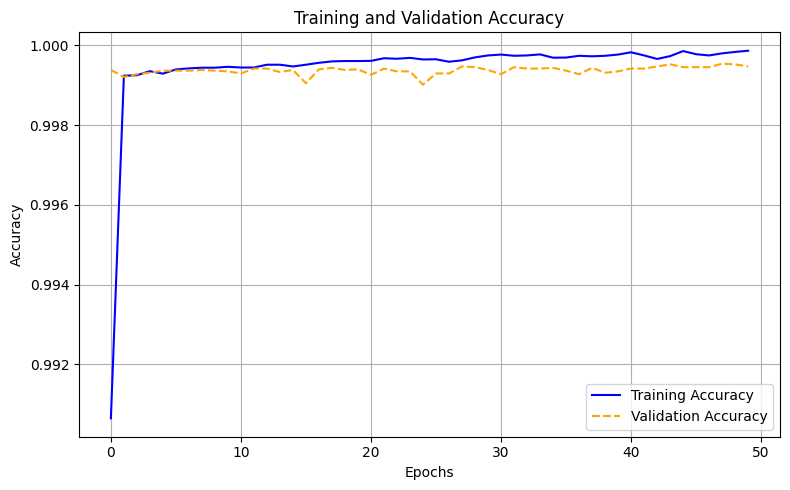

In [4]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import Adam

# Load data
data = pd.read_csv('creditcard.csv')

# Separate features and labels
X = data.drop('Class', axis=1).values
y = data['Class'].values

# Train-test split
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42
)

# Standardize features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# Reshape for Conv1D: (samples, features, 1)
X_train = X_train[..., np.newaxis]
X_val = X_val[..., np.newaxis]

# Define 13-layer CNN model
model = Sequential([
    InputLayer(input_shape=(X_train.shape[1], 1)),

    Conv1D(32, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(64, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Conv1D(128, kernel_size=2, activation='relu'),
    BatchNormalization(),
    MaxPooling1D(pool_size=2),

    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.4),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model (NO class weights used)
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    verbose=1,
    batch_size=2048,
)

# Final accuracy
final_train_acc = history.history['accuracy'][-1]
final_val_acc = history.history['val_accuracy'][-1]

print(f"\nFinal Training Accuracy: {final_train_acc:.4f}")
print(f"Final Validation Accuracy: {final_val_acc:.4f}")

import matplotlib.pyplot as plt

# Extract accuracy values
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_acc) + 1)

# Plot
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy', linestyle='-', color='blue')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy', linestyle='--', color='orange')

plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
